In [ ]:
# Classificação de Substância. Você trabalha em um laboratório de análise química e recebeu um conjunto de dados 
# contendo informações sobre várias substâncias desconhecidas. O objetivo é criar um modelo de classificação para 
# determinar se uma substância é "Ácida" ou "Básica" com base em suas características de pH, "Concentrada" ou "Diluída" 
# com base na concentração, e "Com chiro" com base no cheiro. Siga as etapas abaixo:

#'pH'[3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
#'Concentração'['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
#'Cheiro'['Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro'],
#'Classe'['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']

In [15]:
import pandas as pd

dados = pd.DataFrame({
    'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
    'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada',
                     'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída',
                     'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
    'Cheiro': ['Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro',
               'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro',
               'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida',
               'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']
})

print(dados.head())

    pH Concentração      Cheiro  Classe
0  3.0  Concentrada  Com cheiro   Ácida
1  5.5      Diluída  Sem cheiro  Básica
2  2.5  Concentrada  Com cheiro   Ácida
3  7.0      Diluída  Sem cheiro  Básica
4  4.0  Concentrada  Com cheiro   Ácida


In [16]:
from sklearn.preprocessing import LabelEncoder

le_conc = LabelEncoder()
le_cheiro = LabelEncoder()
le_classe = LabelEncoder()

dados['Concentração'] = le_conc.fit_transform(dados['Concentração'])  # 0 = Concentrada, 1 = Diluída
dados['Cheiro'] = le_cheiro.fit_transform(dados['Cheiro'])            # 0 = Com cheiro, 1 = Sem cheiro
dados['Classe'] = le_classe.fit_transform(dados['Classe'])            # 0 = Ácida, 1 = Básica

X = dados[['pH', 'Concentração', 'Cheiro']].values
y = dados['Classe'].values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [18]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.svm import SVC

modelo = SVC(kernel='linear', random_state=42)
modelo.fit(X_treino, y_treino)

SVC(kernel='linear', random_state=42)

In [20]:
y_pred = modelo.predict(X_teste)
print("Previsões:", y_pred)

Previsões: [0 0 1 1 0]


In [21]:
from sklearn.metrics import accuracy_score

print("Acurácia:", accuracy_score(y_teste, y_pred))


Acurácia: 1.0


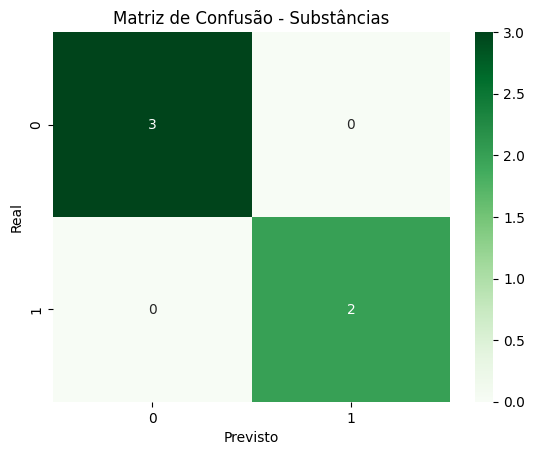

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Substâncias")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Reutilizar X e y já codificados
modelo = SVC(kernel='linear', random_state=42)

scores = cross_val_score(modelo, X, y, cv=5)  # 5-fold cross-validation
print("Scores por fold:", scores)
print("Acurácia média:", scores.mean())


Scores por fold: [1. 1. 1. 1. 1.]
Acurácia média: 1.0
